# File Setup

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import scipy as sp
import scipy.stats
import netCDF4
import pysmile
import pysmile_license

Using the 95th and 5th percentiles with the mean is not a good way to calc the standard deviation (they don't agree). This suggests that the precip projections are not normally distributed, or at least the extremes are not close to a normal distribution

# Load Dataset

In [2]:
xr_test = xr.open_dataset('hpm4sb_drydiff_20230810.nc')
xr_test

<xarray.Dataset>
Dimensions:      (i: 302, j: 501, k: 9, realization: 92)
Coordinates:
  * i            (i) int64 0 1 2 3 4 5 6 7 8 ... 294 295 296 297 298 299 300 301
  * j            (j) int64 0 1 2 3 4 5 6 7 8 ... 493 494 495 496 497 498 499 500
  * k            (k) int64 0 1 2 3 4 5 6 7 8
    x            (i, j) float64 ...
    y            (i, j) float64 ...
    z            (k, i, j) float64 ...
  * realization  (realization) object '10' '18' '26' '44' ... '95' '96' '98'
Data variables:
    ib           (k, i, j) int32 ...
    top          (i, j) float64 ...
    botm         (k, i, j) float64 ...
    hds          (k, i, j, realization) float64 ...
Attributes:
    title:    HPM Regional groundwater model

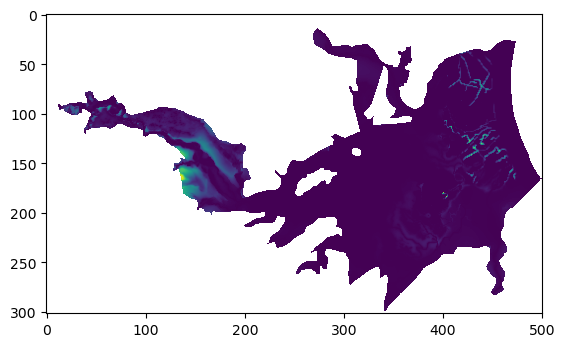

In [3]:
plt.imshow(xr_test.hds[0,:,:,80])

In [4]:
xr_means = (xr_test.hds[0,:,:,:]).mean(dim='realization')
xr_stds = (xr_test.hds[0,:,:,:]).std(dim='realization')

In [5]:
# Because I only have mean-dry, I'm going to invent some data and pretend these are 'mean' and 'dry'

In [6]:
xr_typical_mean = xr_means+np.max(xr_means)
xr_typical_std = xr_stds.copy()*0.2

xr_dry_mean = xr_means.copy()
xr_dry_std = xr_stds.copy()*0.5

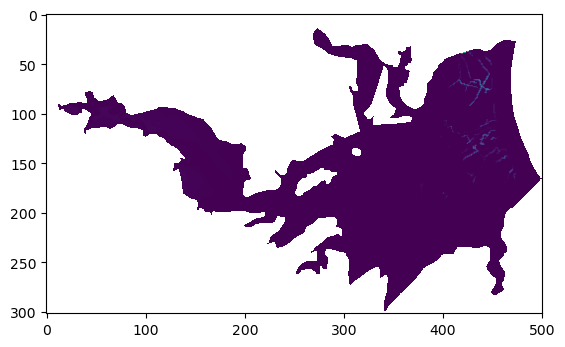

In [7]:
plt.imshow(xr_typical_std)

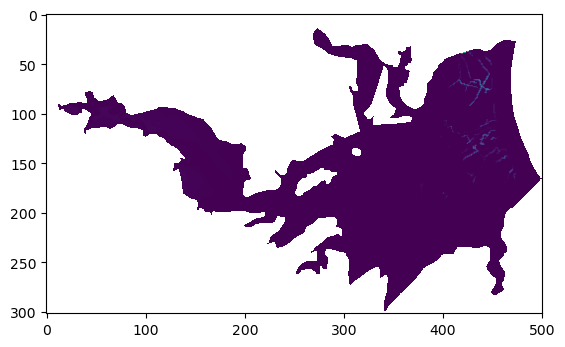

In [8]:
plt.imshow(xr_typical_std)

In [9]:
# Need some historical precip data

# Load the precipitation projection

In [40]:
df_precip_projections = pd.read_csv('HawkesBay_precip_projections.csv',encoding='cp1252')
df_precip_projections.columns = ['rcp','year','mean','p5','p95']
# A really really really bad assumption, but I'm going to average the stdevs calced from the two percentiles given and the mean. The data must not be normally distributed!!!!
#σ ≈ (P95 - μ) / 1.96
df_precip_projections['stdev'] = ((df_precip_projections['p95']-df_precip_projections['mean'])/1.96+(df_precip_projections['mean']-df_precip_projections.p5)/1.645)/2
df_precip_end_century = df_precip_projections[df_precip_projections['year']=='1986–2005 and 2081–2100']

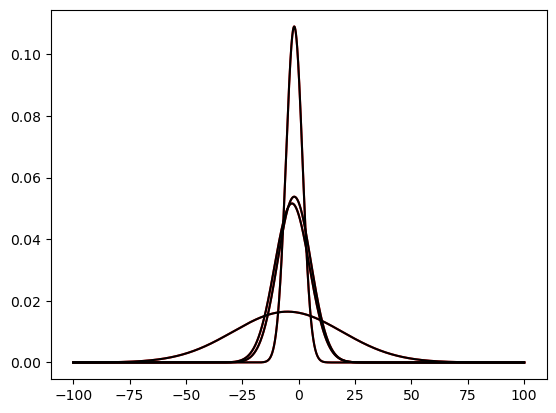

In [43]:
X = np.arange(-100,100,0.01)

for index,row in df_precip_end_century.iterrows():
    Y = scipy.stats.norm(row['mean'],row.stdev).pdf(X)
    plt.plot(X,Y,c='r')
    
for index,row in df_precip_end_century.iterrows():
    Y = scipy.stats.norm(row['mean'],row.stdev).pdf(X)
    plt.plot(X,Y,c='k')

In [41]:
df_precip_end_century

,rcp,year,mean,p5,p95,stdev
4,8.5,1986–2005 and 2081–2100,-3.0,-15.0,13.0,7.729049
5,6.0,1986–2005 and 2081–2100,-5.0,-72.0,10.0,24.191272
6,4.5,1986–2005 and 2081–2100,-2.0,-18.0,8.0,7.414242
7,2.6,1986–2005 and 2081–2100,-2.0,-9.0,4.0,3.658272


In [18]:
df_precip_projections

,rcp,year,mean,p5,p95,stdev
0,8.5,1986–2005 and 2031–50,-2.0,-12.0,5.0,4.825228
1,6.0,1986–2005 and 2031–50,0.0,-10.0,12.0,6.100738
2,4.5,1986–2005 and 2031–50,-1.0,-8.0,6.0,3.913374
3,2.6,1986–2005 and 2031–50,-1.0,-8.0,7.0,4.168476
4,8.5,1986–2005 and 2081–2100,-3.0,-15.0,13.0,7.729049
5,6.0,1986–2005 and 2081–2100,-5.0,-72.0,10.0,24.191272
6,4.5,1986–2005 and 2081–2100,-2.0,-18.0,8.0,7.414242
7,2.6,1986–2005 and 2081–2100,-2.0,-9.0,4.0,3.658272
8,8.5,1986–2005 and 2101–10,-4.0,-18.0,17.0,9.612462
9,6.0,1986–2005 and 2101–10,NaN,NaN,NaN,NaN
